# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import os
import pandas as pd
import numpy as np
import time
from PIL import Image
import seaborn as sb
import json
import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline

## Gather the data

In [2]:
#Data 1. Enhanced twitter archive
tw = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Data 2. Image Predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)


In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# Import twitter-archive-enhanced.csv file into the dataframe
tw=pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
#reaqd through the csv and data to refer information needed during wrangling process
tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
#Review further information of data
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

 ## 2. Using the requests library download the tweet image predictions.

In [8]:
# Image predictions programmatic download using the requests library
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
#read trhough the .tsv data contents
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [9]:
image_predictions=pd.read_csv('image-predictions.tsv' ,sep='\t')

In [10]:
#reading through the image-predictions downloaded file contents
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Image informations.

In [11]:
#description information
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
tw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#display information in the dataset under the image-predictions files
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#check for null values
tw.isnull

<bound method DataFrame.isnull of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689      

In [15]:
tw.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
tw.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
# get information count on data
tw.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

### 3.Data Gathering 
### Additional Data via the Twitter API

In [18]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [19]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tw.tweet_id.values
len(tweet_ids)

2356

In [20]:
# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in tw['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [21]:
#Isolating the json part of each tweepy status object that we have downloaded and adding them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

In [22]:
#adding the file to txt file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [23]:
tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Assesing Data
### Programmatic assessment

### 1.Using twitter archive

In [24]:
#reading twitter file samples
tw.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1199,716791146589110272,NaN,NaN,2016-04-04 00:55:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jennifur. She's supposed to be navigating...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716791146...,11,10,Jennifur,None,None,None,None
1906,674468880899788800,NaN,NaN,2015-12-09 06:01:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He thinks he's flying. 13/10 th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674468880...,13,10,Louis,None,None,None,None
1935,674008982932058114,NaN,NaN,2015-12-07 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup is sad bc he didn't get to be the toy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674008982...,10,10,None,None,None,None,None
1425,697943111201378304,NaN,NaN,2016-02-12 00:39:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She goes door to door trying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697943111...,10,10,Cassie,None,None,None,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None


In [25]:
# getting more information description data from twitter archive datafile
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [26]:
#check analysis on descriptive data
tw.head().describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,5.000000e+00,0.0,0.0,0.0,0.0,5.000000,5.0
mean,8.918861e+17,NaN,NaN,NaN,NaN,12.600000,10.0
std,4.260961e+14,NaN,NaN,NaN,NaN,0.547723,0.0
min,8.913276e+17,NaN,NaN,NaN,NaN,12.000000,10.0
25%,8.916896e+17,NaN,NaN,NaN,NaN,12.000000,10.0
50%,8.918152e+17,NaN,NaN,NaN,NaN,13.000000,10.0
75%,8.921774e+17,NaN,NaN,NaN,NaN,13.000000,10.0
max,8.924206e+17,NaN,NaN,NaN,NaN,13.000000,10.0


In [27]:
tw.isnull().tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2355,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


### 2.Programmatic Assesment 

2. Image predictions

In [28]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [29]:
image_predictions.tail().describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 5 columns):
tweet_id    8 non-null float64
img_num     8 non-null float64
p1_conf     8 non-null float64
p2_conf     8 non-null float64
p3_conf     8 non-null float64
dtypes: float64(5)
memory usage: 384.0+ bytes


In [30]:
image_predictions.head(5).describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,5.000000e+00,5.0,5.000000,5.000000,5.000000
mean,6.660354e+17,1.0,0.507363,0.194762,0.125403
std,1.141945e+13,0.0,0.074792,0.110757,0.065877
min,6.660209e+17,1.0,0.408143,0.074192,0.061428
25%,6.660293e+17,1.0,0.465074,0.138584,0.072010
50%,6.660334e+17,1.0,0.506826,0.156665,0.116197
75%,6.660442e+17,1.0,0.560311,0.243682,0.154629
max,6.660492e+17,1.0,0.596461,0.360687,0.222752


In [31]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1084,718540630683709445,https://pbs.twimg.com/media/CfjE5FRXEAErFWR.jpg,2,Maltese_dog,0.632289,True,West_Highland_white_terrier,0.187055,True,cairn,0.044413,True
1613,801958328846974976,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire_bullterrier,0.327887,True,American_Staffordshire_terrier,0.271916,True,Labrador_retriever,0.247619,True
1607,800513324630806528,https://pbs.twimg.com/media/Cxv-nkJUoAAhzMt.jpg,1,Pembroke,0.828904,True,Cardigan,0.167373,True,Chihuahua,0.000766,True
1608,800751577355128832,https://pbs.twimg.com/media/CxzXOyBW8AEu_Oi.jpg,2,cocker_spaniel,0.771984,True,miniature_poodle,0.076653,True,toy_poodle,0.039618,True
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Quality issues
### Twitter-archive_enhanced dataset and Image_predictions?
1.Expanded URLs from the twitter-archive data and distribution need to be removed

2.Under image_predictions , 

 there is a quality issue in retweet_counts, i hence need to remove the rest  of the data and,

3.therefore there is need to remove the retweets from the data files of tweets .

moreover, remove tweet replies from tweets.

4.there is a quality issue in dog names, where i need capitalize the dog names i to enhance data validity the dataset.

5.in tweeter-archive data, quality issues imerge where through the columns of data, i should replace the Non  values with np.nan

6.removing data duplicates in the dataset will create data integrity and redeable for better analytical procedures.

7.The names are not all correct. I need to alighn the names with breed descriptions and their sctusl names.

8.removing the https records in tweets

### Tidiness issues
1.

Enhanced twitter archive table,
-the dog stages (doggo, floofer, pupper, puppo) should be transposed into one column, dog_stage.

1.

Image predictions table
p1, p2, p3, p1_cof, p2_cof, p3_cof, p1_dog, p2_dog, and p3_dog should be transposed into p, p_conf, p_dog.



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
tw=pd.read_csv('twitter-archive-enhanced.csv')
tw.copy()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [33]:
#Image_predictions copy data
image_predictions =pd.read_csv('image-predictions.tsv')
image_predictions.copy()

,tweet_id jpg_url img_num p1 p1_conf p1_dog p2 p2_conf p2_dog p3 p3_conf p3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...
5,666050758794694657\thttps://pbs.twimg.com/medi...
6,666051853826850816\thttps://pbs.twimg.com/medi...
7,666055525042405380\thttps://pbs.twimg.com/medi...
8,666057090499244032\thttps://pbs.twimg.com/medi...
9,666058600524156928\thttps://pbs.twimg.com/medi...


### Issue #1:

Remove expanded URLs from the twitter-enhanced data.

#### Define:
removing URLs will enhance easy analysis and descriptions of tweets

In [34]:
# Make copies for all datasets
tw_clean = tw.copy()
image_predictions_clean = image_predictions.copy()

### Code

In [35]:
tw_clean['cleantext'] = tw_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [36]:
tw_clean = tw_clean.drop(columns='text')

### test

In [37]:
# It looks like urls are removed.
tw_clean['cleantext'].sample(5)

521     Please only send in dogs. We only rate dogs, n...
2073    Yea I can't handle this job anymore your dogs ...
711     This is Frankie. He has yet to learn how to co...
99      Here's a very large dog. He has a date later. ...
1689    I've been told there's a slight possibility he...
Name: cleantext, dtype: object

In [38]:
tw.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1835,676101918813499392,NaN,NaN,2015-12-13 18:10:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Striker. He's ready for Christmas. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676101918...,11,10,Striker,None,None,None,None
1147,726935089318363137,NaN,NaN,2016-05-02 00:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprout. He's just precious af. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726935089...,12,10,Sprout,None,None,None,None
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675...,10,10,None,None,None,pupper,None
1783,677673981332312066,NaN,NaN,2015-12-18 02:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677673981...,9,10,None,None,None,None,None


### Issue #2:

#### Define 
in thetable: the ratings are not all correct.
Check if numerators are larger than 15 and fix the numbers if unreasonable.

numbers are partially extracted because they include decimals and texts have more than x/x.

### Code

In [39]:
tw_clean.query('rating_numerator >= 15')[['cleantext','rating_numerator']]

,cleantext,rating_numerator
55,@roushfenway These are good dogs but 17/10 is ...,17
188,@dhmontgomery We also gave snoop dogg a 420/10...,420
189,@s8n You tried very hard to portray this good ...,666
285,RT @KibaDva: I collected all the good dogs!! 1...,15
290,@markhoppus 182/10,182
291,@bragg6of8 @Andy_Pace_ we are still looking fo...,15
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
433,The floofs have been released I repeat the flo...,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24


In [40]:
# 1. rating_numerators have decimals and are extracted incorrectly. 
sub1 = tw_clean.iloc[[340, 695, 763, 1712]]

In [41]:
#rating_numerators have decimals and are extracted incorrectly. 
sub1 = tw_clean.iloc[[340, 695, 763, 1712]]

In [42]:
newsub = sub1['cleantext'].str.split('/', n=1, expand=True)
newsub

,0,1
340,"RT @dog_rates: This is Logan, the Chow who liv...",10
695,"This is Logan, the Chow who lived. He solemnly...",10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,10 would smile back
1712,Here we have uncovered an entire battalion of ...,10


In [43]:
sub1["numerator"]= newsub[0].str.extract(r'(\d+\.\d+)$', expand=True).astype(float)
sub1 = sub1[['tweet_id','numerator']]
sub1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_id,numerator
340,832215909146226688,9.75
695,786709082849828864,9.75
763,778027034220126208,11.27
1712,680494726643068929,11.26


In [44]:
# 2. more than one x/x in the text
sub2 = tw_clean.iloc[[313, 1165, 1202]]

In [45]:
#check through the file if correct
newsub = sub2['cleantext'].str.split('/', n=1, expand=True)
newsub

,0,1
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,"00 isn't a valid rating, 13/10 is tho"
1165,Happy 4,20 from the squad! 13/10 for all
1202,This is Bluebert. He just saw that both #Final...,50. Amazed af. 11/10


In [46]:
newsub2 = newsub[1].str.split('/', n=1, expand=True)
newsub2

,0,1
313,"00 isn't a valid rating, 13",10 is tho
1165,20 from the squad! 13,10 for all
1202,50. Amazed af. 11,10


In [47]:
sub2["numerator"]= newsub2[0].str.extract(r'(\d+)$', expand=True).astype(float)
sub2 = sub2[['tweet_id','numerator']]
sub2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_id,numerator
313,835246439529840640,13.0
1165,722974582966214656,13.0
1202,716439118184652801,11.0


In [48]:
#read the new numerator files
suball = sub1.append(sub2)
suball

,tweet_id,numerator
340,832215909146226688,9.75
695,786709082849828864,9.75
763,778027034220126208,11.27
1712,680494726643068929,11.26
313,835246439529840640,13.00
1165,722974582966214656,13.00
1202,716439118184652801,11.00


In [49]:
#need to merge the sets of numerator readings
tw_clean2 = pd.merge(tw_clean, suball, on='tweet_id', how='left')

In [50]:
tw_clean2['corrected_numerator'] = tw_clean2['rating_numerator']
tw_clean2['corrected_numerator'][tw_clean2.numerator.notnull()] = tw_clean2['numerator']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
# hence the new column, corrected_numerator is created. Remove the old column, numerator.
tw_clean2 = tw_clean2.drop(columns='numerator')

### test

In [52]:
#testing the merger files values
tw_clean2.iloc[[313, 340, 695, 763, 1202, 1712]][['cleantext','corrected_numerator']]

,cleantext,corrected_numerator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,13.00
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1202,This is Bluebert. He just saw that both #Final...,11.00
1712,Here we have uncovered an entire battalion of ...,11.26


### #Issue3

### Define
removing retweetd data and reply rows from the dataset

### Code

In [53]:
import pandas as pd
tw_clean= pd.read_csv('twitter-archive-enhanced.csv')

In [54]:
#removing retweets
tw_clean = tw_clean[tw_clean.retweeted_status_id.isnull()]

### test

In [55]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Define 
Issue ,removing additonal tweet reply

### Code 

In [56]:
#Few columns are needed for analysis in tweets files to enhance visibility
tw_clean = tw_clean[tw_clean.in_reply_to_status_id.isnull()]

### test

In [57]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### #Issue 4

### Define 
capitalize the dog names 

### Code

In [58]:
#capitalize the dog names in the twitter-archive-dataset
#clean the names from data file
tw_clean['name']
#Capitalize the dog names
tw['name'] = tw.name.str.capitalize()

### test 

In [59]:
tw['name'].head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object


### Issue #5

### Define
the Timestamp should be saved in date re adjacement in a format for reference.

### Code

In [60]:
# 1. convert string to datetime format and explanation
tw_clean['timestampn'] = pd.to_datetime(tw_clean['timestamp'])

In [61]:
# 2. extract data before August, 1st, 2017
tw_clean = tw_clean[tw_clean['timestamp'] <= '2017-08-01']

In [62]:
tw_clean = tw_clean.drop(columns='timestamp')

# test

In [63]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 2 to 2355
Data columns (total 17 columns):
tweet_id                      2095 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
source                        2095 non-null object
text                          2095 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2092 non-null object
rating_numerator              2095 non-null int64
rating_denominator            2095 non-null int64
name                          2095 non-null object
doggo                         2095 non-null object
floofer                       2095 non-null object
pupper                        2095 non-null object
puppo                         2095 non-null object
timestampn                    2095 non-null datetime64[ns]
dtypes: datetime64[ns](1), float

In [64]:
sum(tw_clean[tw_clean['timestampn'] >= '2017-08-01']['tweet_id'])

0

### Issue #6

### Define 
removing data duplicates in the dataset in tweets files to enhance availability and consistent data files.

### Code 

In [65]:
#remove the  duplicates in the csv file should be deleted.
sum(image_predictions.duplicated())

0

### test for duplicates

In [66]:
image_predictions.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

### Issue #7

### Define 
The names are not all correct.
I need to alighn the names with breed descriptions and their sctusl names.

### Code

In [67]:
name = tw_clean['name'].value_counts().keys().tolist()
name

['None',
 'a',
 'Lucy',
 'Charlie',
 'Cooper',
 'Oliver',
 'Tucker',
 'Penny',
 'the',
 'Lola',
 'Sadie',
 'Winston',
 'Toby',
 'Daisy',
 'Bo',
 'Koda',
 'Oscar',
 'Jax',
 'Bailey',
 'Bella',
 'Stanley',
 'an',
 'Milo',
 'Dave',
 'Louis',
 'Chester',
 'Leo',
 'Rusty',
 'Bentley',
 'Scout',
 'Buddy',
 'Alfie',
 'Gary',
 'Cassie',
 'Boomer',
 'Bear',
 'very',
 'Finn',
 'Oakley',
 'George',
 'Sammy',
 'Jerry',
 'Clarence',
 'Sophie',
 'Scooter',
 'Duke',
 'Brody',
 'Gus',
 'one',
 'Jack',
 'Maggie',
 'Reggie',
 'Jeffrey',
 'Clark',
 'Larry',
 'Winnie',
 'Archie',
 'Chip',
 'Dexter',
 'Phil',
 'Derek',
 'Wallace',
 'just',
 'Wyatt',
 'Gerald',
 'Steven',
 'Shadow',
 'Louie',
 'Olive',
 'Reginald',
 'Otis',
 'Mia',
 'Max',
 'Walter',
 'Wilson',
 'Nala',
 'Ellie',
 'Beau',
 'Earl',
 'Riley',
 'Reese',
 'Sunny',
 'quite',
 'Zeke',
 'Rosie',
 'Waffles',
 'Ted',
 'Maximus',
 'Samson',
 'Loki',
 'Jimothy',
 'Carl',
 'Bruce',
 'Hank',
 'Klevin',
 'Zoey',
 'Gizmo',
 'Kyle',
 'Sebastian',
 'Vincent

### test

In [68]:
array = ['None', 'a', 'Bo', 'the', 'an', 'very', 'just', 'one', 'getting', 'not', 'such', 'by', 'my', 'infuriating', 'all', 'his', 'this', 'o', 'old']
tw_clean = tw_clean.loc[tw_clean['name'].isin(array)]
tw_clean[['name']]

,name
5,None
7,None
12,None
22,such
24,None
25,None
35,None
37,None
41,None
42,None


## Issue #8

### Define

Enhanced Twitter Archive table: clean the column, text by removing url.
Remove the string starting 'https' in text column.


### Code

In [69]:
tw_clean['cleantext'] = tw_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [70]:
tw_clean = tw_clean.drop(columns='text')

In [71]:
# It looks like urls are removed.
tw_clean['cleantext'].sample(5)

2145    I've never seen a dog so genuinely happy about...
1410    HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 f...
2354    This is a western brown Mitsubishi terrier. Up...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2220    Good teamwork between these dogs. One is on lo...
Name: cleantext, dtype: object

### Tidiness

### Define
doggo, floofer, pupper, and puppo do not follow the tidy data rule, 
values should not be column names, Hence, these columns should be transposed into one column named dog_stage

### Code

In [72]:
tw_clean['doggo'] = tw_clean['doggo'].str.replace('None','',regex=False)
tw_clean['floofer'] = tw_clean['floofer'].str.replace('None','',regex=False)
tw_clean['pupper'] = tw_clean['pupper'].str.replace('None','',regex=False)
tw_clean['puppo'] = tw_clean['puppo'].str.replace('None','',regex=False)

In [73]:
tw_clean['dog_stage'] = (tw_clean['pupper']+' '+tw_clean['doggo']+' '+tw_clean['puppo']+' '+tw_clean['floofer']).str.strip()

tw_clean['dog_stage'] = tw_clean['dog_stage'].str.replace('  ',' ',regex=False) 

In [74]:
tw_clean = tw_clean.drop(columns=['doggo','floofer','pupper','puppo','name','rating_numerator','rating_denominator'])

In [75]:
tw_clean = pd.merge(tw_clean, tw_clean, on='tweet_id', how='left')

### test

In [76]:
#tw_clean['dog_stage'].value_counts()
tw_clean

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,source_x,retweeted_status_id_x,retweeted_status_user_id_x,retweeted_status_timestamp_x,expanded_urls_x,timestampn_x,cleantext_x,...,in_reply_to_status_id_y,in_reply_to_user_id_y,source_y,retweeted_status_id_y,retweeted_status_user_id_y,retweeted_status_timestamp_y,expanded_urls_y,timestampn_y,cleantext_y,dog_stage_y
0,891087950875897856,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,
1,890729181411237888,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,2017-07-28 00:22:40,When you watch your owner call another dog a g...,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,2017-07-28 00:22:40,When you watch your owner call another dog a g...,
2,889665388333682689,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,puppo
3,887517139158093824,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. Th...,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. Th...,
4,887343217045368832,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,2017-07-18 16:08:03,You may not have known you needed to see this ...,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,2017-07-18 16:08:03,You may not have known you needed to see this ...,
5,887101392804085760,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,2017-07-18 00:07:08,This... is a Jubilant Antarctic House Bear. We...,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,2017-07-18 00:07:08,This... is a Jubilant Antarctic House Bear. We...,
6,885518971528720385,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,2017-07-13 15:19:09,I have a new hero and his name is Howard. 14/10,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,2017-07-13 15:19:09,I have a new hero and his name is Howard. 14/10,
7,885167619883638784,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,2017-07-12 16:03:00,Here we have a corgi undercover as a malamute....,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,2017-07-12 16:03:00,Here we have a corgi undercover as a malamute....,
8,884441805382717440,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,2017-07-10 15:58:53,"I present to you, Pup in Hat. Pup in Hat is gr...",...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.co

### Define

p1, p2, p3, p1_cof, p2_cof, p3_cof, p1_dog, p2_dog and p3_dog are the values instead of column names.

In [77]:
#Image_predictions copy data
image_predictions=pd.read_csv('image-predictions.tsv' ,sep='\t')
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1287,751132876104687617,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True
603,679844490799091713,https://pbs.twimg.com/media/CW9K9VeVAAE0j-x.jpg,1,Airedale,0.903832,True,Border_terrier,0.034713,True,toy_poodle,0.021378,True
1923,857029823797047296,https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg,2,golden_retriever,0.968623,True,Labrador_retriever,0.010325,True,Saluki,0.004148,True
1697,816697700272001025,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1,Chihuahua,0.756992,True,Pomeranian,0.052850,True,Maltese_dog,0.047608,True
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False


In [78]:
image_predictions = image_predictions.drop(columns=['p3','p3_conf','p3_dog','p2','p2_conf','p2_dog'])
image_predictions['rank_algorithm'] = 1

In [79]:
image_predictions = image_predictions.drop(columns=['p1','p1_conf','p1_dog'])
image_predictions['rank_algorithm'] = 2

In [80]:
image_predictions = image_predictions.rename(columns = {"p1": "prediction", "p1_conf":"confident", "p1_dog": "breed_dog"}) 
image_predictions = image_predictions.rename(columns = {"p2": "prediction", "p2_conf":"confident", "p2_dog": "breed_dog"}) 


In [81]:
image_predictions = image_predictions.append(image_predictions, ignore_index = True).append(image_predictions, ignore_index = True) 

### test

In [82]:
image_predictions['rank_algorithm'].value_counts()

2    6225
Name: rank_algorithm, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [83]:
tw.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')
image_predictions.to_csv('image_predicitions.csv',index=False, encoding = 'utf-8)')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [84]:
tw.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1059,741743634094141440,NaN,NaN,2016-06-11 21:27:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Aqua. She's a sandy pupper. Not sure how ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741743634...,11,10,Aqua,None,None,pupper,None
261,842846295480000512,NaN,NaN,2017-03-17 21:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's wishing you a very fun a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,None,None,None,None
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,13,10,None,None,floofer,None,None
951,751950017322246144,NaN,NaN,2016-07-10 01:23:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Lola. She's a surfing pupper. 13/10 ma...,NaN,NaN,NaN,https://vine.co/v/5WrjaYAMvMO,13,10,Lola,None,None,pupper,None
278,840268004936019968,NaN,NaN,2017-03-10 18:27:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monty. He makes instantly regrettable ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840268004...,12,10,Monty,None,None,None,None


In [85]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,rank_algorithm
1809,832757312314028032,https://pbs.twimg.com/media/C46MWnFVYAUg1RK.jpg,2,2
180,669327207240699904,https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg,1,2
5119,706516534877929472,https://pbs.twimg.com/media/Cc4NCQiXEAEx2eJ.jpg,1,2
332,672139350159835138,https://pbs.twimg.com/media/CVPrLE2WwAELCxD.jpg,1,2
5455,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,2


### Insights:
1.Twitter archive dataset has varied data which currently are upto date with the actual imporatance
for analysis transformation.

2.Dropping of duplicates from the analyzed creates clear impression and rating on insights that are then generated from the data files and interpretations.

3.null values in that data files are removed to signify and brake the data fioles complexity.

### Visualization

In [86]:
#Check for dog analysis, types and those found in the dataset
def df_plotting(tw):
    tw.groupby(df.image_predictions).plot(kind='bar')
    plt.show()
    tw.head()

In [87]:
tw=pd.read_csv('image-predictions.tsv')
tw.head()

,tweet_id jpg_url img_num p1 p1_conf p1_dog p2 p2_conf p2_dog p3 p3_conf p3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


In [88]:
#read the images files
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')

In [89]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [90]:
image_predictions.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [ ]:
image_predictions.head(2)

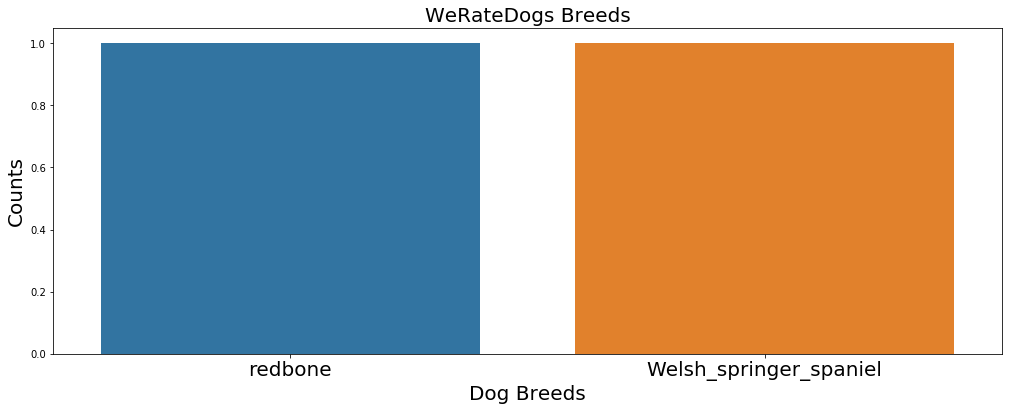

In [266]:
df=image_predictions.head(2)
plt.figure(figsize = (17,6))
ax = sb.barplot(x = df['first_prediction'].value_counts()[0:10].index,
            y =df['first_prediction'].value_counts()[0:10],
            data = df);
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 20);
plt.xlabel("Dog Breeds",fontsize = 20);
plt.ylabel("Counts",fontsize = 20);
plt.title("WeRateDogs Breeds",fontsize = 20);

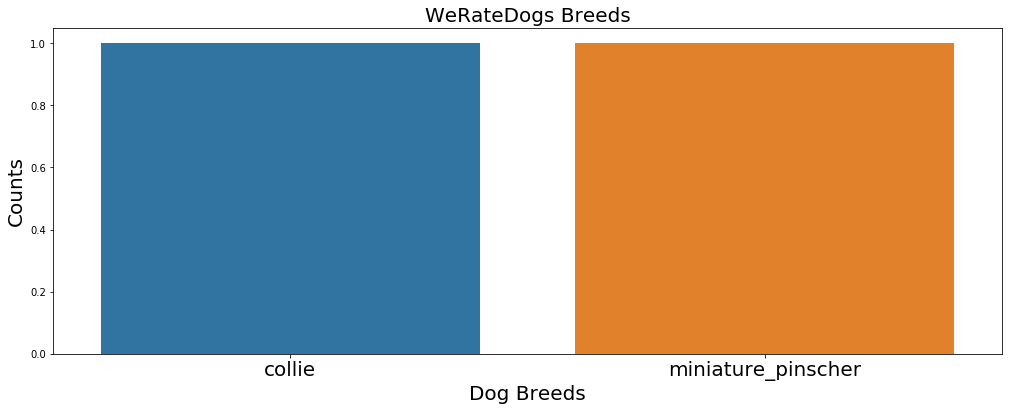

In [267]:
df=image_predictions.head(2)
plt.figure(figsize = (17,6))
ax = sb.barplot(x = df['second_prediction'].value_counts()[0:10].index,
            y =df['second_prediction'].value_counts()[0:10],
            data = df);
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 20);
plt.xlabel("Dog Breeds",fontsize = 20);
plt.ylabel("Counts",fontsize = 20);
plt.title("WeRateDogs Breeds",fontsize = 20);

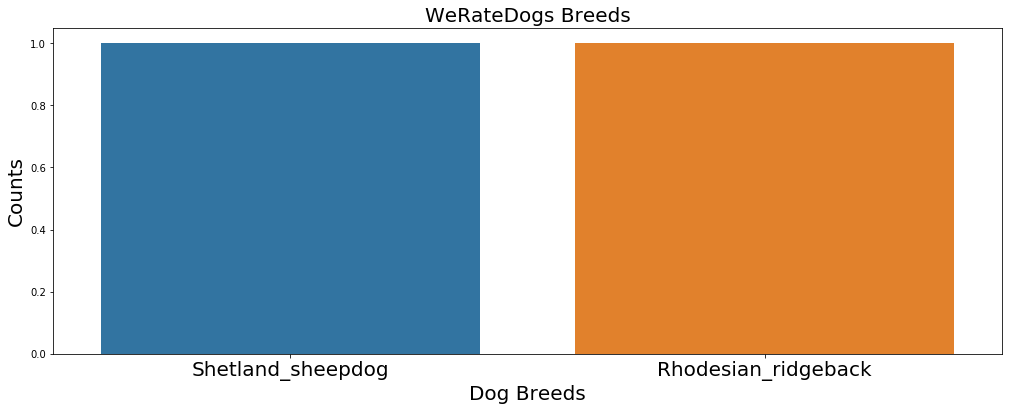

In [268]:
df=image_predictions.head(2) 
plt.figure(figsize = (17,6))
ax = sb.barplot(x = df['third_prediction'].value_counts()[0:10].index,y =df['third_prediction'].value_counts()[0:10],data = df);
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 20);plt.xlabel("Dog Breeds",fontsize = 20);plt.ylabel("Counts",fontsize = 20);
plt.title("WeRateDogs Breeds",fontsize = 20);

### Insights from data from WeRate Dogs images

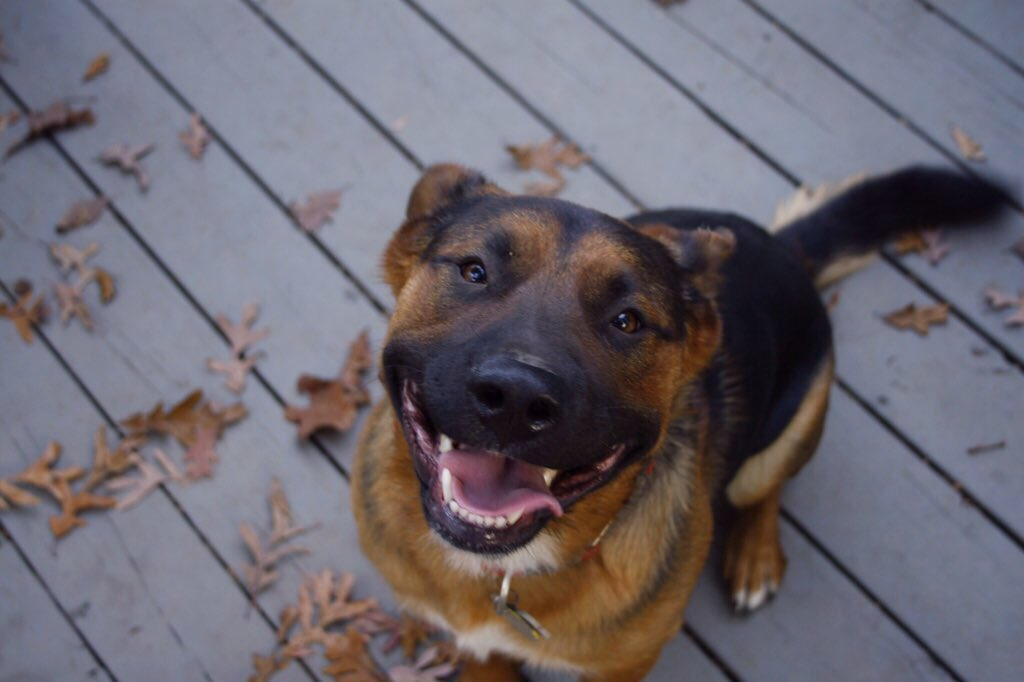

In [269]:
#First WeRateDogsImage(German_shepherd)
import IPython
url = 'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg'
IPython.display.Image(url, width = 250)

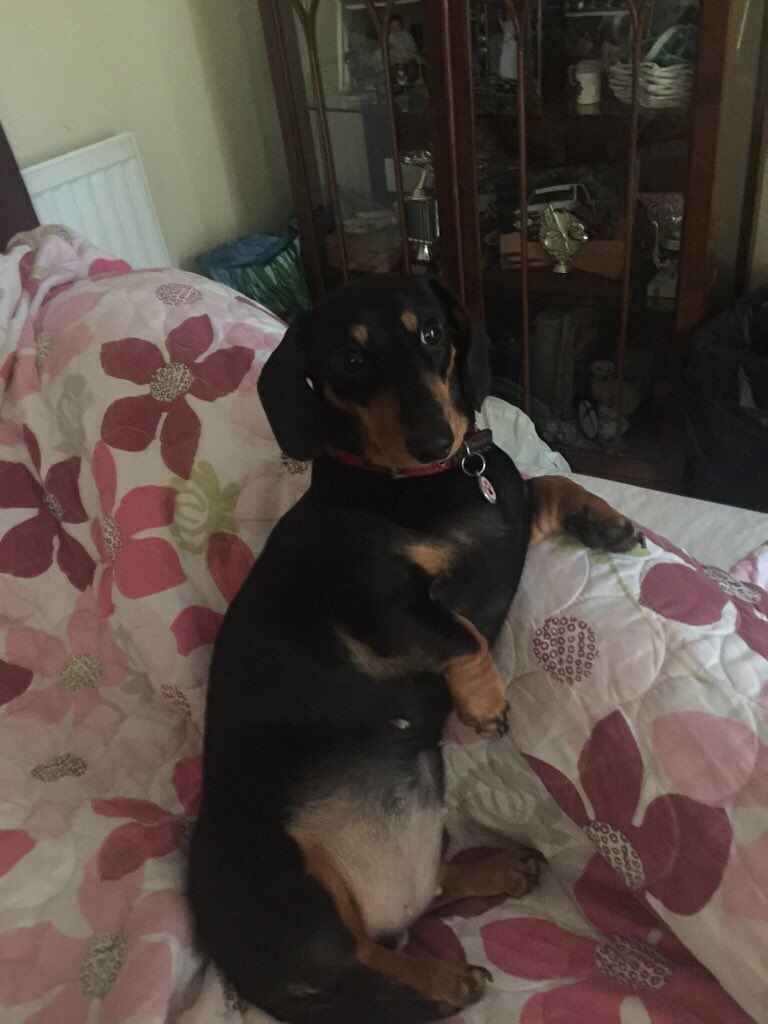

In [270]:
#second WeRateDogsImage(miniature_pinscher)
import IPython
url = 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg'
IPython.display.Image(url, width = 250)

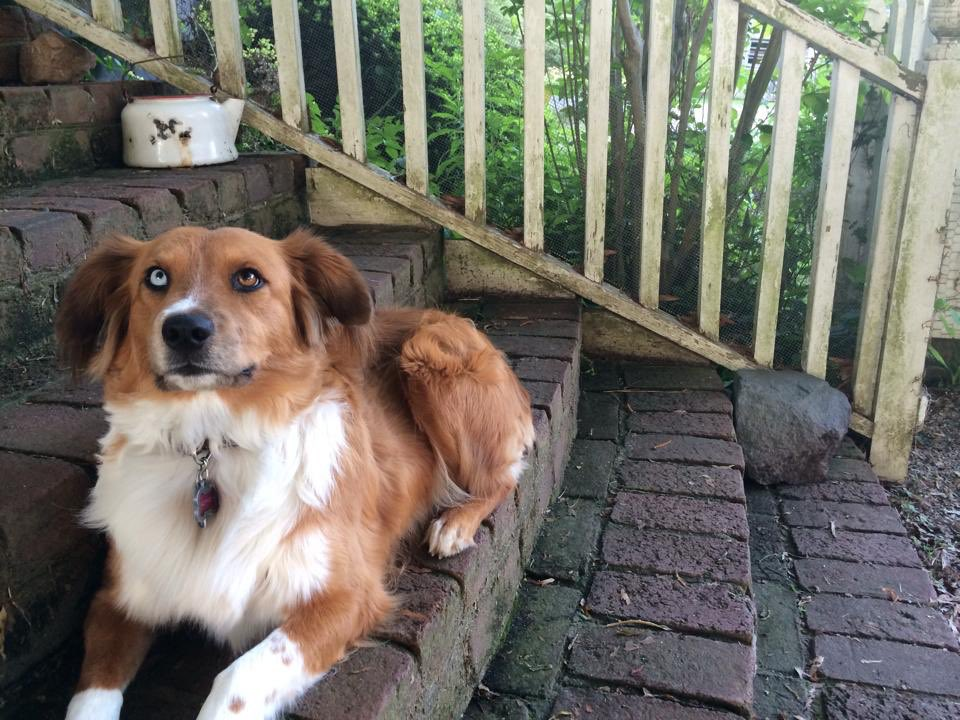

In [271]:
#third WeRateDogsImage(Welsh_springer_spaniel)
import IPython
url = 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'
IPython.display.Image(url, width = 250)

### Store data generated from analysis

In [272]:
#storing data to twitter_archive_master.csv file 
df.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')
image_predictions.to_csv('image_predictions.tsv',index=False, encoding ='utf-8')

In [273]:
#Create a copy of data
df=df.copy()
image_predictions=image_predictions.copy()
